<a href="https://colab.research.google.com/github/preetikumari1992/EDA/blob/master/Face%20recognition%20using%20Opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install cmake
! pip install dlib
! pip install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=9dc07ea066b32f9ff24f12a96e533fc1d800945b69ed4209615f3d8691853b37
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [10]:
!mkdir known
!wget https://thebetterindia.gumlet.io/uploads/2018/11/APJ-Kalam-123.jpg -O known/kalam.jpg
!wget https://cdn.cnn.com/cnnnext/dam/assets/181218164622-modi-0418-01-super-tease.jpg -O known/modi.jpg
!wget https://fr.news-front.info/wp-content/uploads/2019/09/preview-88.jpg -O known/sundar.jpg

--2020-08-13 07:04:27--  https://thebetterindia.gumlet.io/uploads/2018/11/APJ-Kalam-123.jpg
Resolving thebetterindia.gumlet.io (thebetterindia.gumlet.io)... 13.227.223.55, 13.227.223.111, 13.227.223.58, ...
Connecting to thebetterindia.gumlet.io (thebetterindia.gumlet.io)|13.227.223.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72142 (70K) [image/jpeg]
Saving to: ‘known/kalam.jpg’

known/kalam.jpg     100%[===================>]  70.45K  --.-KB/s    in 0.006s  

2020-08-13 07:04:28 (11.2 MB/s) - ‘known/kalam.jpg’ saved [72142/72142]

--2020-08-13 07:04:31--  https://cdn.cnn.com/cnnnext/dam/assets/181218164622-modi-0418-01-super-tease.jpg
Resolving cdn.cnn.com (cdn.cnn.com)... 104.66.97.48, 2a02:26f0:f4:19b::3134, 2a02:26f0:f4:1a3::3134
Connecting to cdn.cnn.com (cdn.cnn.com)|104.66.97.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51090 (50K) [image/jpeg]
Saving to: ‘known/modi.jpg’

known/modi.jpg      100%[==================

In [43]:
!mkdir unknown
!wget https://static.politico.com/f2/86/c8a5fca043eeb0ccf6decee47992/15-donald-trump-46-ap-1160.jpg -O unknown/1.jpg
!wget https://thebetterindia.gumlet.io/uploads/2018/11/APJ-Kalam-123.jpg -O unknown/2.jpg
!wget https://www.infomance.com/wp-content/uploads/2018/12/sundar-pichai-son.png -O unknown/3.jpg
!wget https://fr.news-front.info/wp-content/uploads/2019/09/preview-88.jpg -O unknown/4.jpg
!wget https://cdn1.thr.com/sites/default/files/2018/12/sundar_pichai-getty-h_2018_0.jpg -O unknown/5.jpg
!wget https://www.newszii.com/wp-content/uploads/2018/07/Dr-APJ-Abdul-Kalam.jpg -O unknown/6.jpg
!wget https://cdn.cnn.com/cnnnext/dam/assets/181218164622-modi-0418-01-super-tease.jpg -O unknown/7.jpg

mkdir: cannot create directory ‘unknown’: File exists
--2020-08-13 08:07:15--  https://static.politico.com/f2/86/c8a5fca043eeb0ccf6decee47992/15-donald-trump-46-ap-1160.jpg
Resolving static.politico.com (static.politico.com)... 104.18.18.118, 104.18.19.118, 2606:4700::6812:1276, ...
Connecting to static.politico.com (static.politico.com)|104.18.18.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177515 (173K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>] 173.35K  --.-KB/s    in 0.08s   

2020-08-13 08:07:16 (2.03 MB/s) - ‘unknown/1.jpg’ saved [177515/177515]

--2020-08-13 08:07:18--  https://thebetterindia.gumlet.io/uploads/2018/11/APJ-Kalam-123.jpg
Resolving thebetterindia.gumlet.io (thebetterindia.gumlet.io)... 13.227.223.111, 13.227.223.58, 13.227.223.55, ...
Connecting to thebetterindia.gumlet.io (thebetterindia.gumlet.io)|13.227.223.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7

In [44]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

In [45]:
img = cv2.imread('known/modi.jpg')

In [46]:
print(img)
img.shape

[[[ 0  1  2]
  [ 0  1  2]
  [ 0  1  2]
  ...
  [ 6  6  6]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  1  2]
  [ 0  1  2]
  [ 0  1  2]
  ...
  [ 0  0  0]
  [15 15 15]
  [ 0  0  0]]

 [[ 0  1  2]
  [ 0  1  2]
  [ 0  1  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


(619, 1100, 3)

In [47]:
def read_img (path):
  img=cv2.imread(path)
  (h,w)=img.shape[:2]
  width=700
  ratio=width/float(w)
  height=int(h*ratio)
  return cv2.resize(img, (width,height))

In [48]:
img_enc = face_recognition.face_encodings(img)[0]
img_enc

array([-0.07794406,  0.10255376, -0.00380196, -0.11624879, -0.02155481,
       -0.0538051 ,  0.04889824, -0.10308562,  0.20392764, -0.05350078,
        0.16079958,  0.06277459, -0.26172706, -0.10333252,  0.0867641 ,
        0.06676597, -0.13987923, -0.10430901, -0.0863407 , -0.10531919,
        0.04459639,  0.03837052,  0.09412932,  0.04420139, -0.12876269,
       -0.243871  , -0.12372896, -0.12621658,  0.04512308, -0.06642593,
        0.0121791 ,  0.04810885, -0.21283896, -0.07331143,  0.00865205,
        0.07646629, -0.11004608, -0.08968626,  0.18702467,  0.02209662,
       -0.13234794, -0.02648303,  0.02591833,  0.19951347,  0.2619507 ,
       -0.03377976,  0.02483002, -0.04848212,  0.08663812, -0.2462716 ,
        0.08973201,  0.14934945, -0.00075793,  0.1580438 ,  0.0346044 ,
       -0.15624267,  0.01504983,  0.15540417, -0.20635924,  0.02717955,
        0.07415323, -0.14026442, -0.10338648, -0.01132262,  0.11752073,
        0.15143676, -0.11300718, -0.17488518,  0.12592512, -0.19

In [49]:
img_enc.shape

(128,)

In [50]:
known_encodings=[]
known_names=[]

In [51]:
known_dir='known'
for file in os.listdir(known_dir):
  img=read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

In [52]:
known_encodings

[array([-0.06800335,  0.06682982,  0.0801067 , -0.04986784, -0.10066128,
        -0.06066662, -0.03828146, -0.06780466,  0.08740407, -0.13879436,
         0.18489179, -0.00336664, -0.26627451, -0.0728281 ,  0.04364402,
         0.0917302 , -0.17168331, -0.12706341, -0.11860463, -0.12536585,
         0.02898854,  0.03645118,  0.04159213, -0.01571289, -0.16365612,
        -0.28639761, -0.10938434, -0.07083262,  0.09531806, -0.06379177,
         0.03876697, -0.01170233, -0.19306134, -0.03709556, -0.01384482,
         0.08483702, -0.00423445, -0.0342943 ,  0.22089043, -0.03232551,
        -0.19297573, -0.01313723,  0.06598222,  0.19891338,  0.26295525,
         0.05087872,  0.04228888, -0.03843157,  0.14029339, -0.19462468,
         0.0176454 ,  0.14331836,  0.16327716,  0.04266255,  0.10299636,
        -0.10897002,  0.02123357,  0.14747268, -0.21032107,  0.00325191,
         0.06287035, -0.10376406,  0.031617  , -0.0428052 ,  0.18774803,
        -0.01985656, -0.10359947, -0.16307472,  0.2

In [53]:
known_names

['kalam', 'sundar', 'modi']

Processing 6.jpg


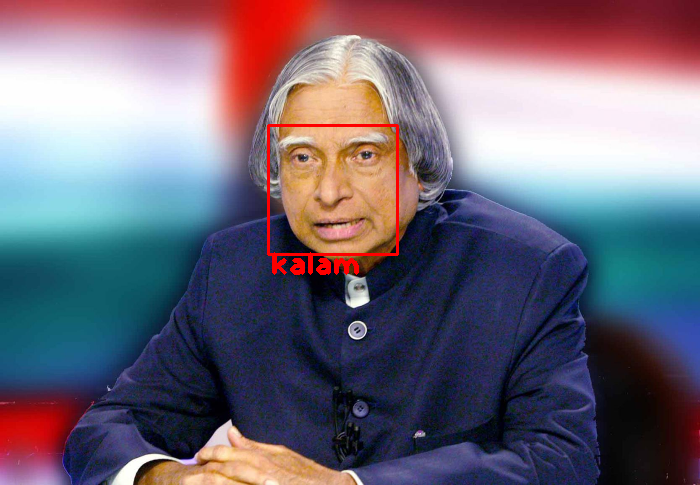

Processing 1.jpg
Processing 7.jpg


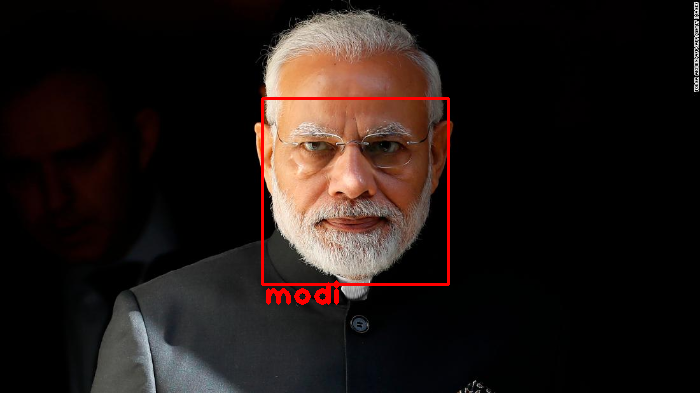

Processing 5.jpg


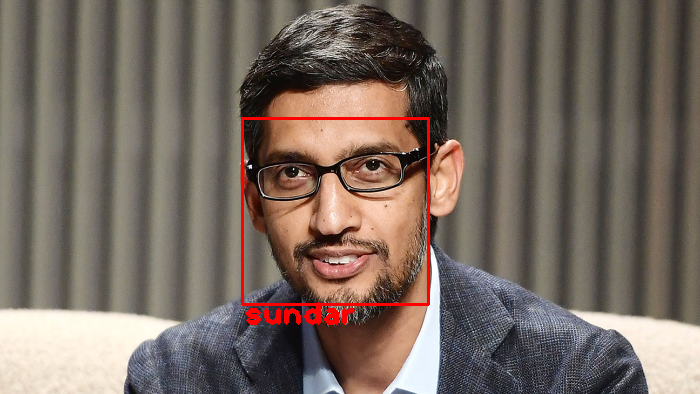

Processing 2.jpg


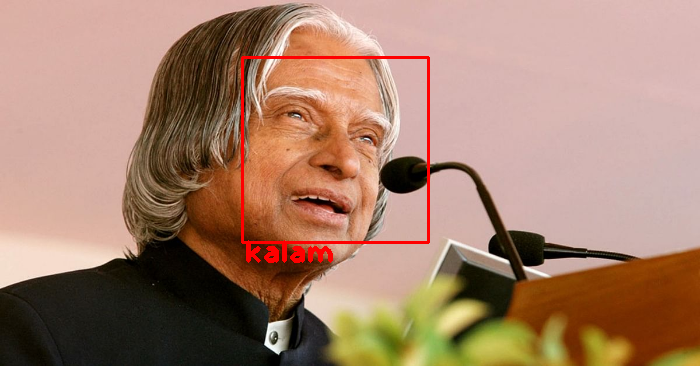

Processing 3.jpg
Processing 4.jpg


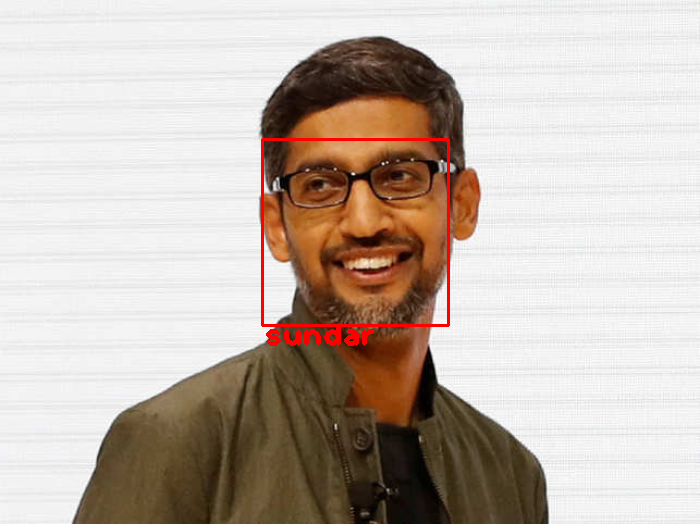

[False, True, False]


In [54]:
unknown_dir='unknown'
for file in os.listdir(unknown_dir):
  print('Processing', file)
  img=read_img(unknown_dir +'/' + file)
  img_enc=face_recognition.face_encodings(img)[0]
  results=face_recognition.compare_faces(known_encodings, img_enc)

  for i in range(len(results)):
    if(results[i]):
      name=known_names[i]
      (t,r,b,l)=face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (l,t), (r,b), (0,0,255), 2)
      cv2.putText(img, name, (l+2, b+20), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 3)
      cv2_imshow(img)
  
print(results)